In [ ]:
# https://www.drawingfromdata.com/filter-transform-group-with-pandas

In [127]:
import re
import numpy as ny 
import pandas as ps
import matplotlib.pyplot as ml
import seaborn as sb

In [128]:
DF=ps.read_csv(r"C:\Users\ShinChan\Downloads\titanic_dataset (1).csv",encoding="latin-1")

In [362]:
DF.head(3)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [220]:
DF.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [222]:
DF["survived"].unique()

array([1, 0], dtype=int64)

In [61]:
P=len(DF[DF.survived==1])
p=len(DF[DF.survived==0])

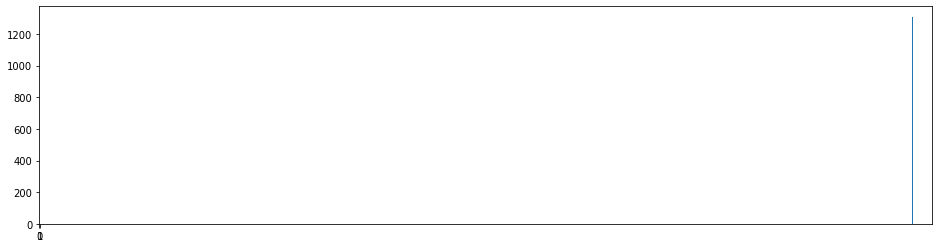

In [444]:
ml.figure(figsize=(16,4))
ml.bar(DF.gender.value_counts(),len(DF.survived))

ml.xticks(range(0,2))
ml.show()

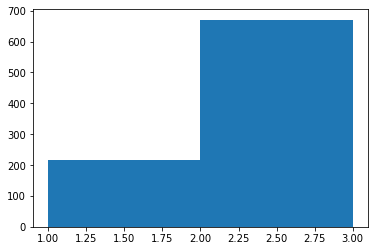

In [73]:
ml.hist(DF.pclass,2)
ml.show()

In [224]:
DF["Name_len"]=[len(i) for i in DF["name"]]

In [225]:
DF

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Name_len
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",30
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",28
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",36
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,20
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,21
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,25
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,19


<BarContainer object of 1309 artists>

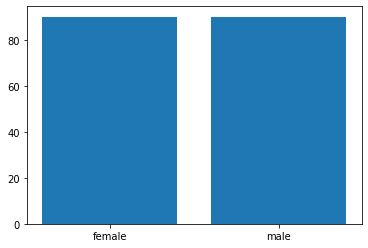

In [227]:
ml.bar(DF.gender,90)

In [229]:
len(DF[DF["gender"]=="male"])

843

In [92]:
DF["gender"].replace({"male":0,"female":1},inplace=True)

In [93]:
DF

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500,22
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833,50
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250,21
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,43
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500,23
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,0,27.0,0,0,13.0000,20
883,1,1,Miss. Margaret Edith Graham,1,19.0,0,0,30.0000,27
884,0,3,Miss. Catherine Helen Johnston,1,7.0,1,2,23.4500,30
885,1,1,Mr. Karl Howell Behr,0,26.0,0,0,30.0000,20


In [232]:
len(DF["gender"])-len(DF[DF["gender"]=="male"])

466

In [244]:
DF[DF["gender"]=="male"].count()

pclass       843
survived     843
name         843
gender       843
age          658
sibsp        843
parch        843
ticket       843
fare         842
cabin        154
embarked     843
boat         167
body         113
home.dest    457
Name_len     843
dtype: int64

In [252]:
(DF[DF["gender"]=="male"].count()/len(DF["gender"]))*100

pclass       64.400306
survived     64.400306
name         64.400306
gender       64.400306
age          50.267380
sibsp        64.400306
parch        64.400306
ticket       64.400306
fare         64.323911
cabin        11.764706
embarked     64.400306
boat         12.757830
body          8.632544
home.dest    34.912147
Name_len     64.400306
dtype: float64

In [115]:
len(DF[DF["Survived"]==1])/len(DF[DF["Survived"]==0])

0.6275229357798165

In [253]:
DF.describe()

,pclass,survived,age,sibsp,parch,fare,body,Name_len
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,27.130634
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922,9.506503
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,12.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000,20.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000,25.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000,30.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,82.000000


In [254]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
gender       1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
Name_len     1309 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [255]:
DF.dtypes

pclass         int64
survived       int64
name          object
gender        object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
Name_len       int64
dtype: object

In [256]:
DF.count(axis=0)

pclass       1309
survived     1309
name         1309
gender       1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
Name_len     1309
dtype: int64

In [258]:
DF["gender"].mode()

0    male
dtype: object

In [186]:
for i in DF.columns:
    if DF[i].dtypes == ("int64" or "float64"):
        DF[i].fillna(DF[i].mean(),inplace=True)
    elif DF[i].dtypes == ("object"):
        DF[i].fillna(DF[i].mode(),inplace=True)
    elif DF[i][0] == "NaN":
        DF[i][0]="kk"
        print(i)


In [260]:
DF["age"].isnull().sum()

263

In [267]:
DF["survived"][0:8]="NaN"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [268]:
DF

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Name_len
0,1,NaN,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29
1,1,NaN,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",30
2,1,NaN,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",28
3,1,NaN,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",36
4,1,NaN,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,20
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,21
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,25
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,19


In [270]:
DF["age"].isnull().sum(axis=0)

263

In [275]:
DF.drop(columns=["name"],index=[1305])

,pclass,survived,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Name_len
0,1,NaN,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29
1,1,NaN,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",30
2,1,NaN,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",28
3,1,NaN,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",36
4,1,NaN,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3,0,male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN,21
1304,3,0,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,20
1306,3,0,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,25
1307,3,0,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,19


In [301]:
for i in DF.columns:
    if DF[i].dtypes == ("int64" or "float64"):
        DF[i].fillna(DF[i].mean(),inplace=True)
        print("mmmmmmmmmmmmm",i)
    elif DF[i].dtypes == ("object"):
        DF[i].fillna(DF[i].mode(),inplace=True)
        print('ob', i)
    elif DF[i][0] == "NaN":
        DF[i][0]="kk"
        print(i)


mmmmmmmmmmmmm pclass
mmmmmmmmmmmmm survived
ob name
ob gender
mmmmmmmmmmmmm sibsp
mmmmmmmmmmmmm parch
ob ticket
ob cabin
ob embarked
ob boat
ob home.dest


In [302]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
gender       1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [300]:
DF.age.isnull().sum()

263

In [286]:
dd=DF["age"].fillna(DF["age"].mean(),inplace=True)

In [305]:
DF["pclass"][0:5]="NaN"
DF

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,NaN,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,NaN,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,NaN,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,NaN,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,NaN,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [317]:
DF

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,NaN,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,NaN,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,NaN,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,NaN,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,NaN,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [328]:
DF["pclass"][0:5]=DF["pclass"].mode().unique()[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [332]:
DF["age"].mean()

29.8811345124283

In [330]:
DF


,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,3,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,3,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [335]:
for i in DF.columns:
    if DF[i][0] == 3:
        DF[i]="kk"
        print(i)
    elif DF[i].dtypes == ("int64" or "float64"):
        DF[i].fillna(DF[i].mean(),inplace=True)
        print("mmmmmmmmmmmmm",i)
    elif DF[i].dtypes == ("object"):
        DF[i].fillna(DF[i].mode().unique()[0],inplace=True)
        print('ob', i)
    

pclass
mmmmmmmmmmmmm survived
ob name
ob gender
mmmmmmmmmmmmm sibsp
mmmmmmmmmmmmm parch
ob ticket
ob cabin
ob embarked
ob boat
ob home.dest


In [336]:
DF

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,kk,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,kk,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,kk,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,13,NaN,"Montreal, PQ / Chesterville, ON"
3,kk,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,13,135.0,"Montreal, PQ / Chesterville, ON"
4,kk,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,13,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,kk,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C23 C25 C27,C,13,328.0,"New York, NY"
1305,kk,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C23 C25 C27,C,13,NaN,"New York, NY"
1306,kk,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C23 C25 C27,C,13,304.0,"New York, NY"
1307,kk,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C23 C25 C27,C,13,NaN,"New York, NY"


In [337]:
DF.fillna(1)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,kk,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,1.0,"St Louis, MO"
1,kk,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,1.0,"Montreal, PQ / Chesterville, ON"
2,kk,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,13,1.0,"Montreal, PQ / Chesterville, ON"
3,kk,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,13,135.0,"Montreal, PQ / Chesterville, ON"
4,kk,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,13,1.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,kk,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C23 C25 C27,C,13,328.0,"New York, NY"
1305,kk,0,"Zabour, Miss. Thamine",female,1.0000,1,0,2665,14.4542,C23 C25 C27,C,13,1.0,"New York, NY"
1306,kk,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C23 C25 C27,C,13,304.0,"New York, NY"
1307,kk,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C23 C25 C27,C,13,1.0,"New York, NY"


In [357]:
DF["fare"].isnull().sum()

0

In [348]:
DF["fare"].fillna(DF["fare"].mean(),inplace=True)

In [8]:
for i in DF.columns:
    if DF[i].dtypes == ("float64" ):
        DF[i].fillna(DF[i].mean(),inplace=True)
        print("mmmmmmmmmmmmm",i)
    elif DF[i].dtypes == ("int64"):
        DF[i].fillna(DF[i].mean(),inplace=True)
        print("lll",i)
    elif DF[i].dtypes == ("object"):
        DF[i].fillna(DF[i].mode().unique()[0],inplace=True)
        print('ob', i)

lll pclass
lll survived
ob name
ob gender
mmmmmmmmmmmmm age
lll sibsp
lll parch
ob ticket
mmmmmmmmmmmmm fare
ob cabin
ob embarked
ob boat
mmmmmmmmmmmmm body
ob home.dest


In [370]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
gender       1309 non-null object
age          1309 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1309 non-null float64
cabin        1309 non-null object
embarked     1309 non-null object
boat         1309 non-null object
body         1309 non-null float64
home.dest    1309 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [371]:
DF["age"].isna().sum()

0

In [383]:
DF[DF["pclass"]==2]["survived"].sum()

119

In [382]:
DF[DF["pclass"]==1].sum()

pclass                                                     323
survived                                                   200
name         Allen, Miss. Elisabeth WaltonAllison, Master. ...
gender       femalemalefemalemalefemalemalefemalemalefemale...
age                                                    12286.8
sibsp                                                      141
parch                                                      118
ticket       2416011378111378111378111378119952135021120501...
fare                                                   28265.4
cabin        B5C22 C26C22 C26C22 C26C22 C26E12D7A36C101C23 ...
embarked     SSSSSSSSSCCCCSSSCCCCSSCCSCCCSSSCSSSCSSSCCCSCCS...
boat         21113131331013D1313496B131368A5554813778D13788...
body                                                   52012.3
home.dest    St Louis, MOMontreal, PQ / Chesterville, ONMon...
dtype: object

In [391]:
DF["fare"]=[str(i) for i in DF.fare]

In [392]:
DF

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225,NaN,C,NaN,NaN,NaN


In [404]:
DF[DF["age"]<30].count()

pclass       832
survived     832
name         832
gender       832
age          832
sibsp        832
parch        832
ticket       832
fare         832
cabin        832
embarked     832
boat         832
body         832
home.dest    832
dtype: int64

In [429]:
DF.groupby("age")[["survived"]].mean( )

,survived
age,
0.1667,1.000000
0.3333,0.000000
0.4167,1.000000
0.6667,1.000000
0.7500,0.666667
...,...
70.5000,0.000000
71.0000,0.000000
74.0000,0.000000


In [432]:
DF.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [436]:
DF.gender.value_counts().nunique()

2

In [442]:
DF.to_csv(r"C:\Users\ShinChan\Downloads\titani.csv")

In [441]:
DF["and"]=[i**3 for i in DF.age]

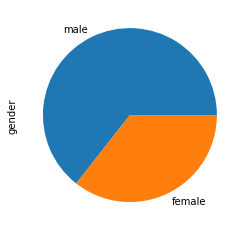

In [446]:
DF.gender.value_counts().plot(kind="pie")

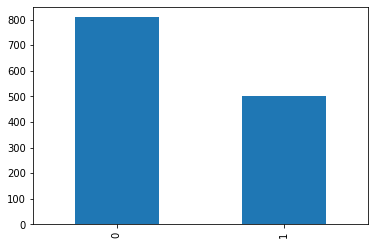

In [465]:
DF["survived"].value_counts().plot(kind="bar")

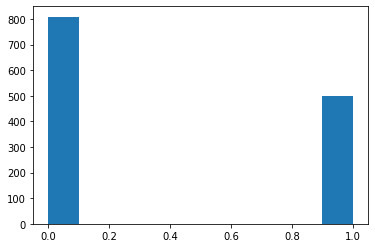

In [473]:
ml.hist(DF["survived"])
ml.show()


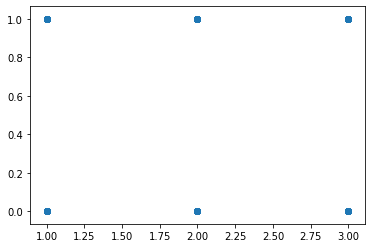

In [478]:
ml.scatter(DF.pclass,DF.survived)

In [507]:
gr=DF.groupby(["pclass","survived"])

In [510]:
gr.groups.keys()

dict_keys([(1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)])

In [511]:
gr.get_group((1, 0))

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,and
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.55,C22 C26,S,13,160.809917,"Montreal, PQ / Chesterville, ON",8.000000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.55,C22 C26,S,13,135.000000,"Montreal, PQ / Chesterville, ON",27000.000000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.55,C22 C26,S,13,160.809917,"Montreal, PQ / Chesterville, ON",15625.000000
7,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0,A36,S,13,160.809917,"Belfast, NI",59319.000000
9,1,0,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,C23 C25 C27,C,13,22.000000,"Montevideo, Uruguay",357911.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,1,0,"Widener, Mr. George Dunton",male,50.000000,1,1,113503,211.5,C80,C,13,160.809917,"Elkins Park, PA",125000.000000
313,1,0,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5,C82,C,13,160.809917,"Elkins Park, PA",19683.000000
316,1,0,"Williams, Mr. Charles Duane",male,51.000000,0,1,PC 17597,61.3792,C23 C25 C27,C,13,160.809917,"Geneva, Switzerland / Radnor, PA",132651.000000
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,29.881135,0,0,113510,35.0,C128,S,13,160.809917,"London, England",26680.333114


In [514]:
dd=DF.groupby(["name","fare"])

In [515]:
dd.groups

{('Abbing, Mr. Anthony', '7.55'): Int64Index([600], dtype='int64'),
 ('Abbott, Master. Eugene Joseph', '20.25'): Int64Index([601], dtype='int64'),
 ('Abbott, Mr. Rossmore Edward', '20.25'): Int64Index([602], dtype='int64'),
 ('Abbott, Mrs. Stanton (Rosa Hunt)',
  '20.25'): Int64Index([603], dtype='int64'),
 ('Abelseth, Miss. Karen Marie', '7.65'): Int64Index([604], dtype='int64'),
 ('Abelseth, Mr. Olaus Jorgensen', '7.65'): Int64Index([605], dtype='int64'),
 ('Abelson, Mr. Samuel', '24.0'): Int64Index([323], dtype='int64'),
 ('Abelson, Mrs. Samuel (Hannah Wizosky)',
  '24.0'): Int64Index([324], dtype='int64'),
 ('Abrahamsson, Mr. Abraham August Johannes',
  '7.925'): Int64Index([606], dtype='int64'),
 ('Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
  '7.2292'): Int64Index([607], dtype='int64'),
 ('Adahl, Mr. Mauritz Nils Martin', '7.25'): Int64Index([608], dtype='int64'),
 ('Adams, Mr. John', '8.05'): Int64Index([609], dtype='int64'),
 ('Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 

In [522]:
dd.groups.values()

dict_values([Int64Index([600], dtype='int64'), Int64Index([601], dtype='int64'), Int64Index([602], dtype='int64'), Int64Index([603], dtype='int64'), Int64Index([604], dtype='int64'), Int64Index([605], dtype='int64'), Int64Index([323], dtype='int64'), Int64Index([324], dtype='int64'), Int64Index([606], dtype='int64'), Int64Index([607], dtype='int64'), Int64Index([608], dtype='int64'), Int64Index([609], dtype='int64'), Int64Index([610], dtype='int64'), Int64Index([611], dtype='int64'), Int64Index([612], dtype='int64'), Int64Index([613], dtype='int64'), Int64Index([325], dtype='int64'), Int64Index([614], dtype='int64'), Int64Index([615], dtype='int64'), Int64Index([616], dtype='int64'), Int64Index([617], dtype='int64'), Int64Index([0], dtype='int64'), Int64Index([618], dtype='int64'), Int64Index([1], dtype='int64'), Int64Index([2], dtype='int64'), Int64Index([3], dtype='int64'), Int64Index([4], dtype='int64'), Int64Index([619], dtype='int64'), Int64Index([620], dtype='int64'), Int64Index(

In [526]:
dd.get_group(('Abbing, Mr. Anthony', '7.55'))

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,and
600,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,C23 C25 C27,S,13,160.809917,"New York, NY",74088.0


In [530]:
DF["age"].map(lambda p: p**2)

0       841.000000
1         0.840339
2         4.000000
3       900.000000
4       625.000000
           ...    
1304    210.250000
1305    892.882200
1306    702.250000
1307    729.000000
1308    841.000000
Name: age, Length: 1309, dtype: float64

In [546]:
DF["aa"],DF["ddd"]=DF[["age","pclass"]].applymap(lambda x:x*6)

In [549]:
qa=DF.groupby(["survived","age"])

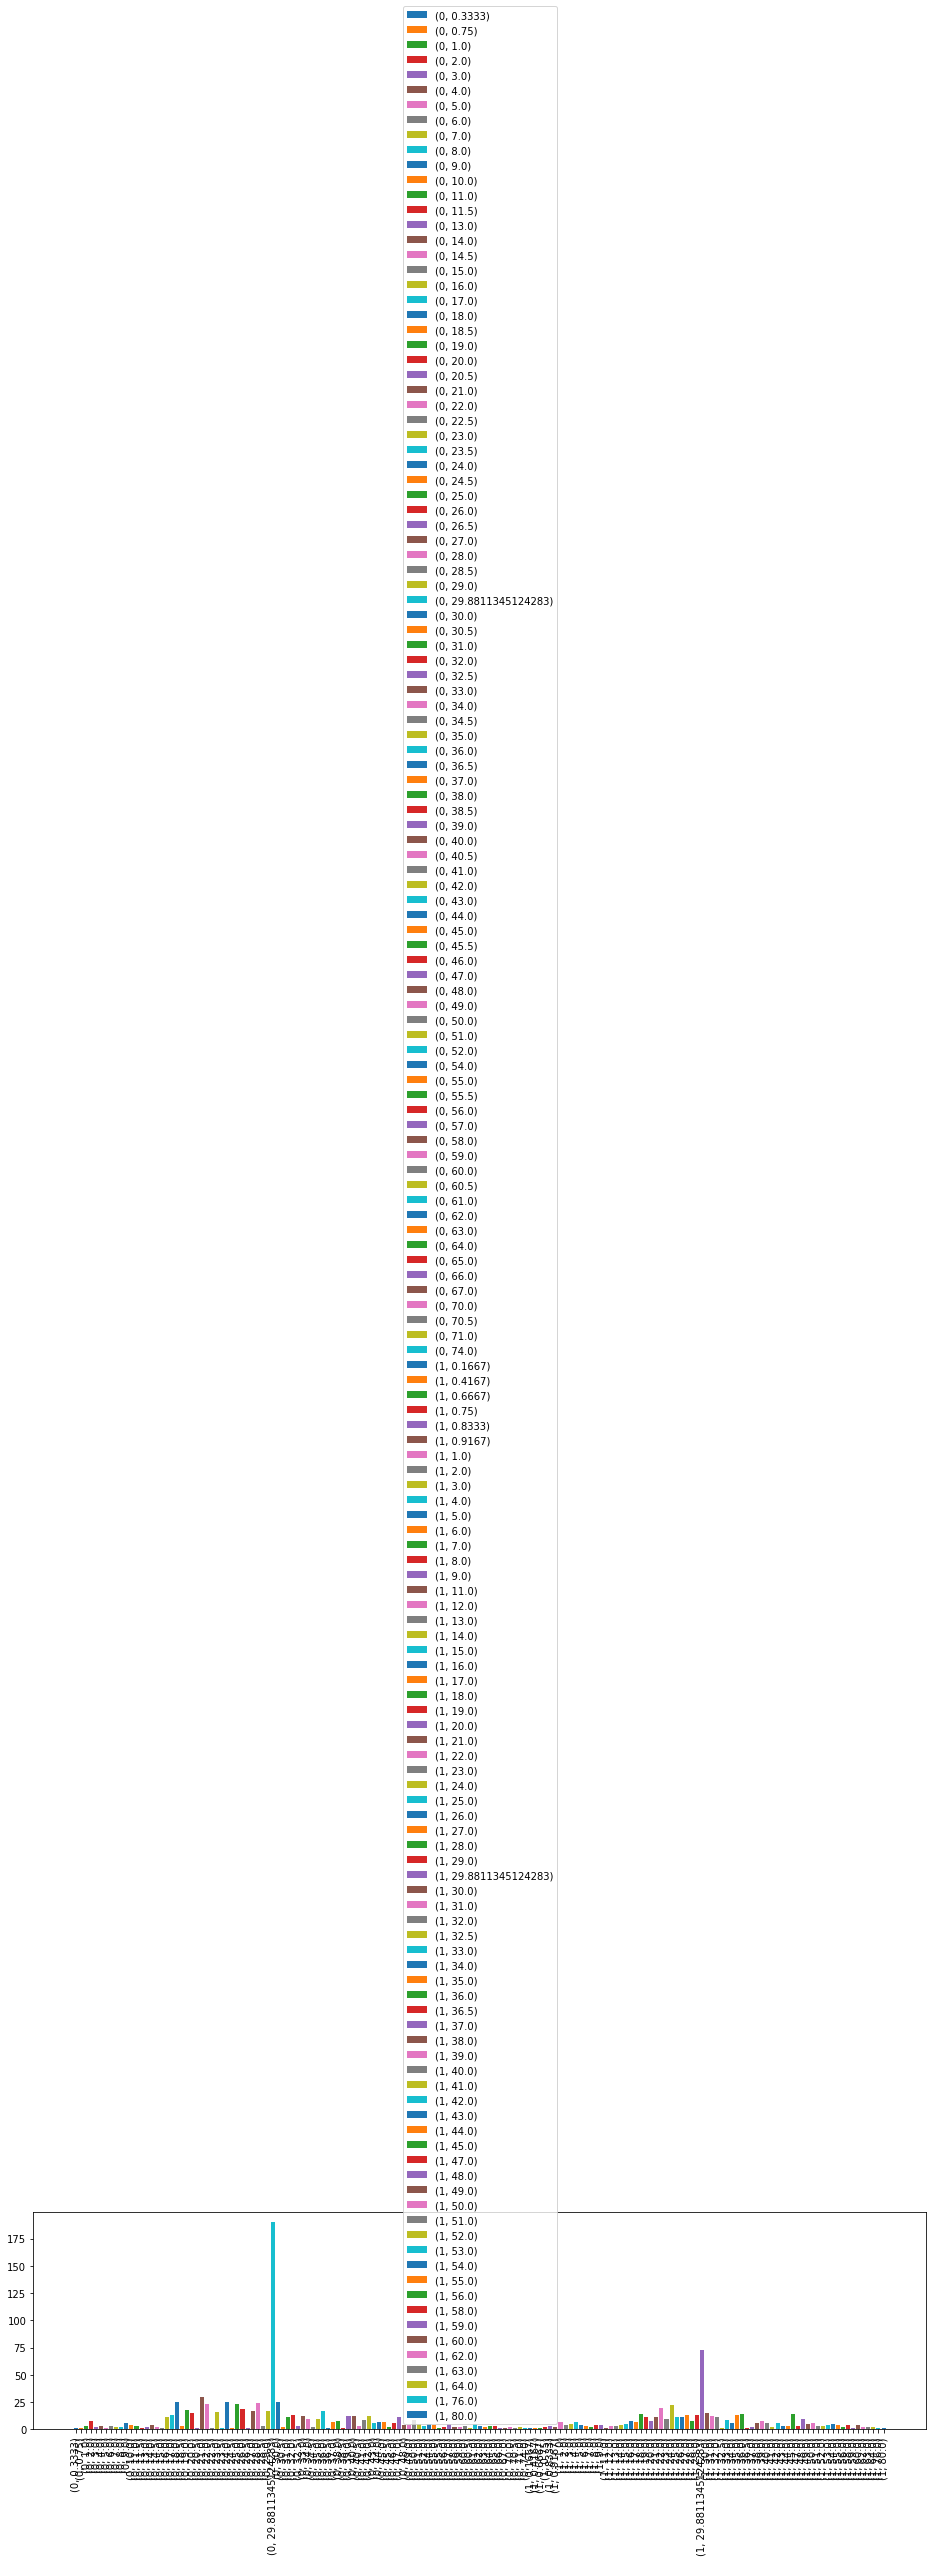

In [566]:
ml.figure(figsize=(16,4))
for i in qa.groups.keys():
    ml.bar(str(i),len(qa.get_group(i)),label=i)
    
ml.legend()
ml.xticks(rotation=90)
ml.show()

In [581]:
ll=DF.groupby(["age","pclass"])

In [582]:
ll

In [587]:
ll.get_group((20,2))

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
353,2,1,"Bryhl, Miss. Dagmar Jenny Ingeborg",female,20.0,1,0,236853,26.0000,NaN,S,12,NaN,"Skara, Sweden / Rockford, IL"
446,2,1,"Hocking, Miss. Ellen ""Nellie""",female,20.0,2,1,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH"
520,2,1,"Nourney, Mr. Alfred (""Baron von Drachstedt"")",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,7,NaN,"Cologne, Germany"
559,2,1,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.7500,NaN,S,11,NaN,"Cornwall / Hancock, MI"


In [595]:
DF.iloc[:,[0,1]]["survived"].count()

1309

In [593]:
DF.loc[[0,1],:]

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [49]:
DF.tail()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,type S
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,C23 C25 C27,C,13,304.000000,"New York, NY",CC
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,C23 C25 C27,C,13,160.809917,"New York, NY",CC
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,C23 C25 C27,S,13,160.809917,"New York, NY",SS
1310,0,1,2,3,4.0,5,6,7,8.000,9,10,11,12.000000,13,14
1311,0,1,2,3,4.0,5,6,7,8.000,9,10,11,12.000000,13,14


In [50]:
DF.loc[1311] = list(range(0,15))

In [657]:
DF.groupby(["age","survived"])[["fare"]].mean()

,,fare
age,survived,
0.1667,1,20.5750
0.3333,0,14.4000
0.4167,1,8.5167
0.6667,1,14.5000
0.7500,0,13.7750
...,...,...
70.5000,0,7.7500
71.0000,0,42.0792
74.0000,0,7.7750


In [661]:
DF.groupby(["pclass","age"])[["survived","fare"]].agg({"ticket":"max","fare":"mean"})

ticket               fare          
               survived      fare survived      fare
pclass age                                          
0      4.0000         1    8.0000      1.0    8.0000
1      0.9167         1  151.5500      1.0  151.5500
       2.0000         0  151.5500      0.0  151.5500
       4.0000         1   81.8583      1.0   81.8583
       6.0000         1  134.5000      1.0  134.5000
...                 ...       ...      ...       ...
3      63.0000        1    9.5875      1.0    9.5875
       65.0000        0    7.7500      0.0    7.7500
       70.5000        0    7.7500      0.0    7.7500
       74.0000        0    7.7750      0.0    7.7750
10     14.0000       11   18.0000     11.0   18.0000

[211 rows x 4 columns]

In [669]:
DF.groupby(["survived","age"])[["pclass"]].apply(lambda l:l.mean())

pclass
survived age            
0        0.3333     3.00
         0.7500     3.00
         1.0000     3.00
         2.0000     2.75
         3.0000     3.00
...                  ...
1        63.0000    2.00
         64.0000    1.00
         76.0000    1.00
         80.0000    1.00
11       14.0000   10.00

[160 rows x 1 columns]

In [671]:
DF.groupby(["survived","age"])[["fare","pclass"]].apply(lambda i :i.mean())

fare  pclass
survived age                       
0        0.3333   14.400000    3.00
         0.7500   13.775000    3.00
         1.0000   32.923600    3.00
         2.0000   41.410937    2.75
         3.0000   17.425000    3.00
...                     ...     ...
1        63.0000  43.772900    2.00
         64.0000  54.854150    1.00
         76.0000  78.850000    1.00
         80.0000  30.000000    1.00
11       14.0000  18.000000   10.00

[160 rows x 2 columns]

In [679]:
DF.groupby(["age","survived"]).get_group((20,1)).count().sum(axis=0)

94

In [684]:
DF.groupby(["age","survived"]).get_group((20,1))[["ticket"]].apply(lambda i:i*2)

,ticket
353,236853236853
446,2910529105
520,SC/PARIS 2166SC/PARIS 2166
559,C.A. 33112C.A. 33112
606,SOTON/O2 3101284SOTON/O2 3101284
664,26632663
970,STON/O 2. 3101285STON/O 2. 3101285
1049,26532653


In [705]:
DF.groupby(["gender","age","survived"]).get_group(("male",20,1))[["pclass"]].apply(lambda a:a**2).filter(lambda o:o["pclass"]>70)

TypeError: 'function' object is not iterable

In [703]:
df=ps.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [704]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [720]:
DF.groupby(["survived"]).filter(lambda x:len(x["fare"])>3)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [9]:
DF.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
DF.embarked.value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [51]:
DF.loc[1310]=list(DF.groupby(["name","embarked"])[["embarked"]].apply(lambda d:d))

ValueError: Must have equal len keys and value when setting with an iterable

In [53]:
DF.tail()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,type S
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,C23 C25 C27,C,13,304.000000,"New York, NY",CC
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,C23 C25 C27,C,13,160.809917,"New York, NY",CC
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,C23 C25 C27,S,13,160.809917,"New York, NY",SS
1310,0,1,2,3,4.0,5,6,7,8.000,9,10,11,12.000000,13,14
1311,0,1,2,3,4.0,5,6,7,8.000,9,10,11,12.000000,13,14


In [103]:
ss=DF.iloc[[2,3],0:7]

In [119]:
sss=DF.loc[[4,5],"pclass":"parch"]

In [126]:
DF.merge(right=sss,how="inner",indicator=True)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,type S,_merge
0,0.0,1.0,2,3,4.0,5.0,6.0,113781,151.55,C22 C26,S,13,160.809917,"Montreal, PQ / Chesterville, ON",SS,both
1,0.0,1.0,2,3,4.0,5.0,6.0,113781,151.55,C22 C26,S,13,160.809917,"Montreal, PQ / Chesterville, ON",SS,both
2,0.0,1.0,2,3,4.0,5.0,6.0,19952,26.55,E12,S,3,160.809917,"New York, NY",SS,both
3,0.0,1.0,2,3,4.0,5.0,6.0,19952,26.55,E12,S,3,160.809917,"New York, NY",SS,both
4,0.0,1.0,2,3,4.0,5.0,6.0,7,8.00,9,10,11,12.000000,13,14,both
5,0.0,1.0,2,3,4.0,5.0,6.0,7,8.00,9,10,11,12.000000,13,14,both
6,0.0,1.0,2,3,4.0,5.0,6.0,7,8.00,9,10,11,12.000000,13,14,both
7,0.0,1.0,2,3,4.0,5.0,6.0,7,8.00,9,10,11,12.000000,13,14,both


In [130]:
DF.head(6)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"


In [220]:
DF.loc[2]=DF.loc[6]

In [221]:
DF[DF.duplicated()]

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"


In [124]:
DF.loc[3]=DF.loc[90]

In [131]:
DF.groupby(["pclass","survived"]).groups

{(1, 0): Int64Index([  2,   3,   4,   7,   9,  10,  15,  16,  19,  25,
             ...
             303, 305, 306, 307, 310, 312, 313, 316, 318, 321],
            dtype='int64', length=123),
 (1, 1): Int64Index([  0,   1,   5,   6,   8,  11,  12,  13,  14,  17,
             ...
             304, 308, 309, 311, 314, 315, 317, 319, 320, 322],
            dtype='int64', length=200),
 (2, 0): Int64Index([323, 325, 326, 327, 328, 330, 331, 332, 334, 335,
             ...
             575, 576, 578, 579, 581, 585, 592, 594, 595, 599],
            dtype='int64', length=158),
 (2, 1): Int64Index([324, 329, 333, 336, 337, 339, 340, 341, 342, 343,
             ...
             586, 587, 588, 589, 590, 591, 593, 596, 597, 598],
            dtype='int64', length=119),
 (3,
  0): Int64Index([ 600,  601,  602,  608,  609,  610,  614,  615,  616,  617,
             ...
             1298, 1299, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308],
            dtype='int64', length=528),
 (3,
  1): Int64In

In [135]:
len(DF.groupby(["pclass","survived"]).groups)

6

In [141]:
len(DF.groupby(["pclass","survived"]).get_group((3,0)))

528

In [142]:
len(DF.groupby(["pclass","survived"]).get_group((3,1)))

181

In [143]:
len(DF.groupby(["pclass","survived"]).get_group((1,0)))

123

In [144]:
len(DF.groupby(["pclass","survived"]).get_group((1,1)))

200

In [158]:
DF.groupby(["pclass","survived"]).get_group((3,0))[["fare"]]

,fare
600,7.5500
601,20.2500
602,20.2500
608,7.2500
609,8.0500
...,...
1304,14.4542
1305,14.4542
1306,7.2250
1307,7.2250


In [204]:
DF.groupby(["pclass","survived"]).get_group((1,1))[["body"]].apply(lambda l:l)

,body
0,NaN
1,NaN
5,NaN
6,NaN
8,NaN
...,...
315,NaN
317,NaN
319,NaN
320,NaN


In [205]:
len(DF.groupby(["pclass","survived"]).get_group((1,1)))

200

In [193]:
DF.dtypes

pclass         int64
survived       int64
name          object
gender        object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [219]:
DF.select_dtypes(exclude="object")

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN
...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,328.0
1305,3,0,NaN,1,0,14.4542,NaN
1306,3,0,26.5000,0,0,7.2250,304.0
1307,3,0,27.0000,0,0,7.2250,NaN


In [254]:
DF.to_dict

<bound method DataFrame.to_dict of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         1                Andrews, Miss. Kornelia Theodosia   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

      gender      age  sibsp  parch  ticket      fare    cabin e

In [236]:
DF.select_dtypes(exclude="float64")

,pclass,survived,name,gender,sibsp,parch,ticket,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,1,"Andrews, Miss. Kornelia Theodosia",female,1,0,13502,D7,S,10,"Hudson, NY"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,1,0,2665,NaN,C,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,1,0,2665,NaN,C,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,0,0,2656,NaN,C,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,0,0,2670,NaN,C,NaN,NaN
